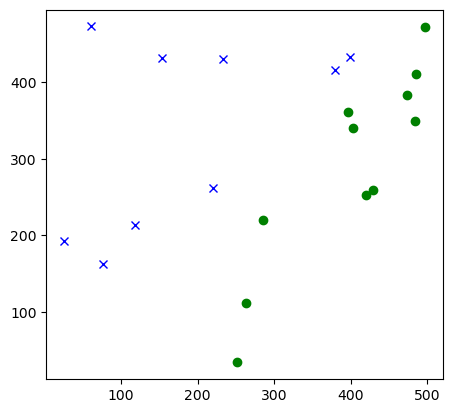

array([[153., 432.],
       [220., 262.],
       [118., 214.],
       [474., 384.],
       [485., 411.],
       [233., 430.],
       [396., 361.],
       [484., 349.],
       [429., 259.],
       [286., 220.],
       [399., 433.],
       [403., 340.],
       [252.,  34.],
       [497., 472.],
       [379., 416.],
       [ 76., 163.],
       [263., 112.],
       [ 26., 193.],
       [ 61., 473.],
       [420., 253.]])

In [58]:
import numpy as np
import matplotlib.pyplot as plt
train=np.loadtxt('images2.csv',delimiter=',',skiprows=1)
train_x=train[:,0:2]  #0,1两行
train_y=train[:,2] # 仅第二行

plt.plot(train_x[train_y==1,0],train_x[train_y==1,1],'go')#先选择 train_y 中值为 1 的所有行对应的 train_x 行。然后从这些行中选择第 0 列的所有值。
plt.plot(train_x[train_y==0,0],train_x[train_y==0,1],'bx')
plt.axis('scaled')
plt.show()
train_x

In [59]:
theta=np.random.rand(3)
mu=train_x.mean(axis=0)
sigma=train_x.std(axis=0)
def standardize(x):
    return (x-mu)/sigma
train_z=standardize(train_x)


标准化的作用：
提高模型性能：不同特征的量纲和取值范围可能差异很大，如果不进行标准化，可能会导致某些特征对模型的影响过大，而其他特征的影响被忽略。标准化可以使每个特征对模型的贡献更加均衡。

加速收敛速度：在梯度下降等优化算法中，标准化可以使损失函数的等高线更加圆形，从而加快收敛速度，减少训练时间。

避免数值不稳定：在某些算法中（例如神经网络），大范围的数值差异可能会导致计算不稳定，甚至导致数值溢出。标准化可以减少这种风险。

提高模型的泛化能力：标准化可以减少模型对训练数据的依赖，使得模型在测试数据上的表现更加稳定和可靠。


In [60]:
def to_matrix(x):
    x0=np.ones([x.shape[0],1])   #为什么需要x0  =【1，1，1】  主要是参数theta 那边的theta0  是没有对应x的
    return np.hstack([x0,x])   #horizontal 竖直堆叠 vertical

X=to_matrix(train_z)

这条语句 x0=np.ones([x.shape[0],1]) 是使用 NumPy 库创建一个全为1的列向量。下面是对这条语句的详细解释：

**np.ones**：这是 NumPy 库中的一个函数，用于创建一个指定形状的数组，并将数组中的所有元素初始化为1。

**[x.shape[0], 1]**：这是传递给 np.ones 函数的参数，指定了要创建的数组的形状：

x.shape[0]：表示数组 x 的行数。x.shape 返回一个包含数组 x 维度的元组，其中 x.shape[0] 是数组 x 的第一维的大小，即行数。
1：表示数组的列数为1。
**x0**：这是变量名，用于存储创建的数组。

综上所述，这条语句的作用是创建一个与数组 x 的行数相同但只有一列的数组，并将所有元素初始化为1。这个数组通常用于在机器学习模型中添加一个偏置项（截距项），例如在逻辑回归或线性回归模型中。

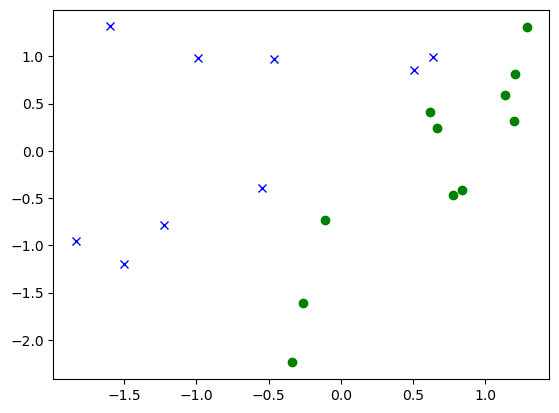

In [61]:
#标准化后数据画图
plt.plot(train_z[train_y==1,0],train_z[train_y==1,1],'go')
plt.plot(train_z[train_y==0,0],train_z[train_y==0,1],'bx')
plt.show()

In [62]:
-theta   #3行1列 公式和编程实现中 np.dot(x, theta) 是等价的，只要形状匹配。
#NumPy 会自动处理向量和矩阵的形状，使得编程实现更加简洁。


array([-0.87893886, -0.51085487, -0.23902939])

In [63]:
def f(x):
    return 1/(1+np.exp(-(np.dot(x,theta))))
#

- 对于单个样本，公式 $$ \\theta^Tdot(x) $$ 是合法的。
- 对于多个样本，公式 $$ X dot(\\theta) $$ 是合法的，因为矩阵乘法的规则要求这样做。
- 对于单个样本，公式 $$ \\theta^T dot(x) $$ 和 $$ X \\theta $$ 都是合法的。
关键在于确保矩阵和向量的形状匹配，以便进行合法的矩阵乘法。


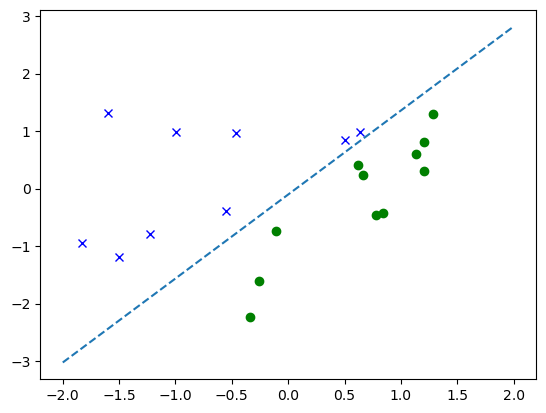

In [64]:
#参数更新部分实现
ETA=1e-3
epoch=5000
for _ in range(epoch):
    theta=theta-ETA*np.dot(f(X)-train_y,X)
    
#决策边界 theta.T x =0是决策边界
#＞=0是横向的  小于等于0是纵向的
x_val=np.linspace(-2,2,100)#这里x0的作用是完全不一样的 实际上是为了画分割线  应用x0代替
plt.plot(train_z[train_y==1,0],train_z[train_y==1,1],'go')
plt.plot(train_z[train_y==0,0],train_z[train_y==0,1],'bx')
plt.plot(x_val, -(theta[0] + theta[1] * x_val) / theta[2], linestyle='dashed')
plt.show()

In [66]:
#对预测数据进行标准化   输入的预测数据也要标准化
f(to_matrix(standardize([[200,100],[100,200]]))) 
#csv中读出是列表,所以单独要放 可以这么放  放两个列表进去,返回x为横项的概率


array([0.87142938, 0.02476814])

并没有明确地写出阈值大于 0.5 的部分。实际上，默认情况下逻辑回归模型的决策边界隐含了这个阈值

In [71]:
def classify(x):
    return (f(x)>=0.8).astype(int)
classify(to_matrix(standardize([[200,100],[100,200]])))  # 返回的就更明显是01了
#astype 是 NumPy 数组对象的方法，用于将数组的元素类型转换为指定的类型。它返回一个新的数组，元素类型为指定的类型。

array([1, 0])

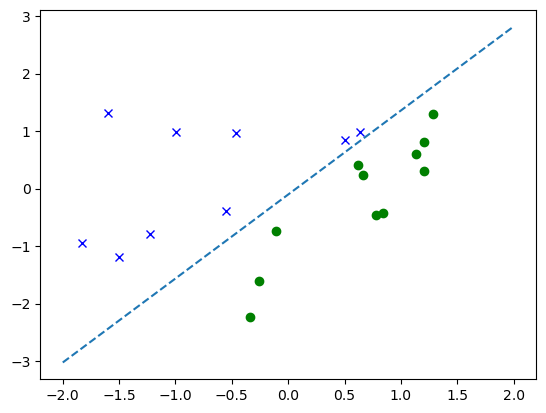

In [76]:
#改阈值
#阈值0.8
#constant = np.log(4)  # 1.386
#阈值0.2
#constant =- np.log(4)  
#阈值改0.1
#constant =- np.log(9) 
#阈值0
constant =np.log(1)
x_val=np.linspace(-2,2,100)#这里x0的作用是完全不一样的 实际上是为了画分割线  应用x0代替
plt.plot(train_z[train_y==1,0],train_z[train_y==1,1],'go')
plt.plot(train_z[train_y==0,0],train_z[train_y==0,1],'bx')
plt.plot(x_val, -(theta[0]-constant + theta[1] * x_val) / theta[2], linestyle='dashed')
plt.show()